In [2]:
file_path = '/content/drive/My Drive/email_spam_classification/spam.csv'

In [3]:
import pandas as pd
import openpyxl
import chardet


In [4]:
# Detect the encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Read the file with detected encoding
df = pd.read_csv(file_path, encoding=encoding)

In [5]:
col_name = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
Df = df.drop(columns = col_name)


In [6]:
Df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [1]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [17]:
from sklearn.preprocessing import LabelEncoder
labels_encoder = LabelEncoder()
Df['labels'] = labels_encoder.fit_transform(Df['v1'])
texts = Df['v2'].tolist()
labels = Df['labels'].tolist()

<ipython-input-17-42050effdc9e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['labels'] = labels_encoder.fit_transform(Df['v1'])


In [18]:
Df['labels'].value_counts()

labels
0    4516
1     653
Name: count, dtype: int64

In [54]:
texts[:5]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though"]

In [7]:
Df.duplicated().sum()

403

In [8]:
Df = Df.drop_duplicates(keep='first')

In [9]:
Df.shape

(5169, 2)

In [13]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
Df.head()

,v1,v2,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
Df['num_characters'] = Df['v2'].apply(len)

<ipython-input-20-440bf8560b9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['num_characters'] = Df['v2'].apply(len)


In [21]:
Df = Df.drop(columns = ['v1'],axis=1)

In [22]:
Df.head(2)

,v2,labels,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29


In [24]:
Df['num_words'] = Df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
Df['num_sentences'] = Df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
Df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

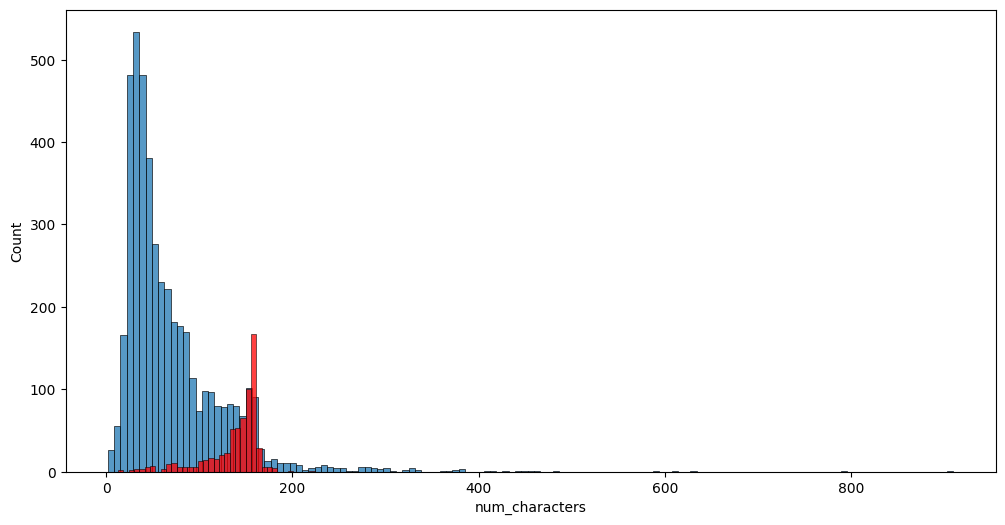

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(Df[Df['labels'] == 0]['num_characters'])
sns.histplot(Df[Df['labels'] == 1]['num_characters'],color='red')

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [39]:
Df['transformed_text'] = Df['v2'].apply(transform_text)

In [41]:
Df.head(1)

,v2,labels,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
spam_wc = wc.generate(Df[Df['labels'] == 1]['transformed_text'].str.cat(sep=" "))

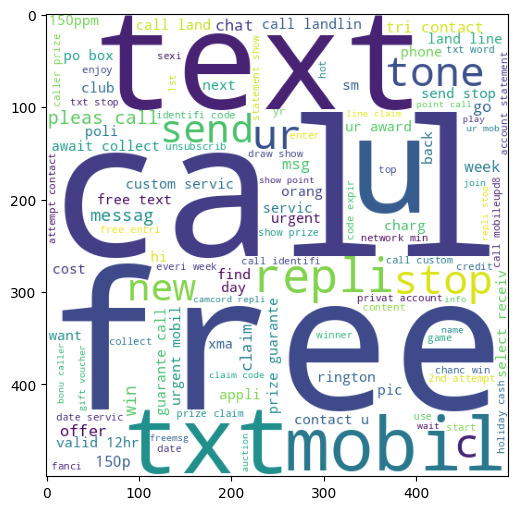

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(Df[Df['labels'] == 0]['transformed_text'].str.cat(sep=" "))

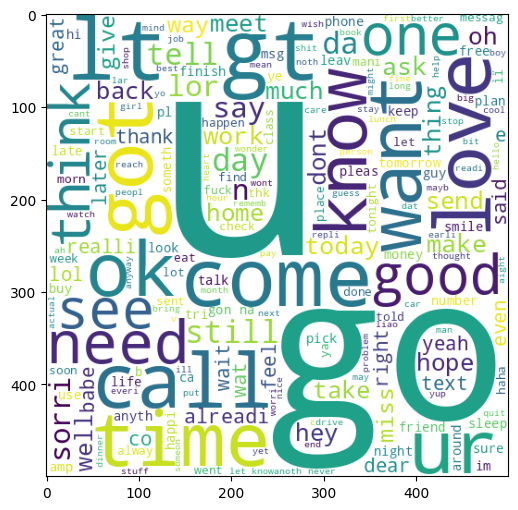

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [60]:
import torch
from transformers import DistilBertTokenizer, AutoTokenizer
from transformers import DistilBertForSequenceClassification, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

In [55]:
transformed_texts = Df['transformed_text'].tolist()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train_texts, val_texts, train_labels, val_labels = train_test_split(transformed_texts, labels,
                                                                    test_size=0.2, random_state=42)

In [61]:
checkpoint = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)
# model = DistilBertForSequenceClassification.from_pretrained(checkpoint, num_labels=len(labels[0]),
#                                                             problem_type="single_label_classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [62]:


# Specify the correct checkpoint and the number of labels for binary classification
checkpoint = 'distilbert-base-uncased'  # Or any other model checkpoint
num_labels = 2  # Binary classification

model = DistilBertForSequenceClassification.from_pretrained(
    checkpoint,
    num_labels=num_labels,
    problem_type="single_label_classification"  # Correct problem type for binary classification
)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [63]:
class CustomDataset(Dataset):
  def __init__(self, texts, labels, tokenizer, max_len=128):
    self.texts = texts
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, idx):
    text = str(self.texts[idx])
    label = torch.tensor(self.labels[idx])

    encoding = self.tokenizer(text, truncation=True, padding="max_length", max_length=self.max_len, return_tensors='pt')

    return {
        'input_ids': encoding['input_ids'].flatten(),
        'attention_mask': encoding['attention_mask'].flatten(),
        'labels': label
    }

In [64]:
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer)

In [ ]:
# import numpy as np
# from sklearn.metrics import roc_auc_score, f1_score, hamming_loss
# from transformers import EvalPrediction
# import torch


# def multi_labels_metrics(predictions, labels, threshold=0.3):
#   sigmoid = torch.nn.Sigmoid()
#   probs = sigmoid(torch.Tensor(predictions))

#   y_pred = np.zeros(probs.shape)
#   y_pred[np.where(probs>=threshold)] = 1
#   y_true = labels

#   f1 = f1_score(y_true, y_pred, average = 'macro')
#   roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
#   hamming = hamming_loss(y_true, y_pred)

#   metrics = {
#       "roc_auc": roc_auc,
#       "hamming_loss": hamming,
#       "f1": f1
#   }

#   return metrics

# def compute_metrics(p:EvalPrediction):
#   preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

#   result = multi_labels_metrics(predictions=preds,
#                                 labels=p.label_ids)

#   return result

In [65]:
import numpy as np
from sklearn.metrics import roc_auc_score,accuracy_score, f1_score, hamming_loss
from transformers import EvalPrediction
import torch

# Binary classification metrics calculation
def binary_classification_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))

    y_pred = (probs >= threshold).int().numpy()
    y_true = labels

    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, probs)
    accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        "roc_auc": roc_auc,
        "accuracy": accuracy,
        "f1": f1
    }

    return metrics

# Compute metrics function for Trainer
def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions

    result = binary_classification_metrics(predictions=preds, labels=p.label_ids)

    return result


In [70]:
from transformers import TrainingArguments, Trainer
from transformers import get_scheduler


args = TrainingArguments(
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    output_dir='./results',
    num_train_epochs=5,
    save_steps=1000,
    save_total_limit=2,
    learning_rate=5e-5,
)

# Define learning rate scheduler
num_training_steps = len(train_dataset) * args.num_train_epochs

# lr_scheduler = get_scheduler(
#     "linear",
#     optimizer=trainer.optimizer,
#     num_warmup_steps=0,
#     num_training_steps=num_training_steps,
# )

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    # optimizers=(trainer.optimizer, lr_scheduler)  # Include scheduler
)

In [27]:
import transformers
print(transformers.__version__)


4.41.2


In [71]:
trainer.train()

Step,Training Loss
500,0.116500
1000,0.052200
1500,0.018300
2000,0.003900
2500,0.008300


TrainOutput(global_step=2585, training_loss=0.03853044204370657, metrics={'train_runtime': 283.7184, 'train_samples_per_second': 72.872, 'train_steps_per_second': 9.111, 'total_flos': 684690866803200.0, 'train_loss': 0.03853044204370657, 'epoch': 5.0})

In [75]:
from transformers import logging

logging.set_verbosity_info()


In [82]:
text = """Unsubscribe from this email


Hi Arpan,

The internet is broken. It’s flooded with ads, spam, misinformation, disinformation, division, and hate.

But it doesn’t have to be that way. There is a healthy way to talk to each other that inspires, informs, empowers, and brings people together.

Join more than one million members to support a better place on the internet. Membership is 20% off during our summer membership campaign, now until August 17"""

# Tokenize the input text
encoding = tokenizer(text, return_tensors='pt')
encoding = encoding.to(trainer.model.device)

# Make predictions
with torch.no_grad():
    outputs = trainer.model(**encoding)

# Apply sigmoid to get probabilities for binary classification
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(outputs.logits[0].cpu())

# Get the predicted label (0 or 1)
predicted_label = torch.argmax(probs).item()

# Map the predicted label to class names
label_mapping = {0: "ham", 1: "spam"}
predicted_class_name = label_mapping[predicted_label]

# Print the result
print(f"Predicted Class: {predicted_class_name}")

Predicted Class: ham


In [40]:
!pip install uvicorn

In [38]:
!pip install fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.4/341.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [84]:
model.save_pretrained('distilbert-spam_classification')
tokenizer.save_pretrained('distilbert-spam_classification')

Configuration saved in distilbert-spam_classification/config.json
Model weights saved in distilbert-spam_classification/model.safetensors
tokenizer config file saved in distilbert-spam_classification/tokenizer_config.json
Special tokens file saved in distilbert-spam_classification/special_tokens_map.json


('distilbert-spam_classification/tokenizer_config.json',
 'distilbert-spam_classification/special_tokens_map.json',
 'distilbert-spam_classification/vocab.txt',
 'distilbert-spam_classification/added_tokens.json')

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Create a path in Google Drive
drive_path = '/content/drive/My Drive/distilbert-spam_classification'

# Copy the directory to Google Drive
shutil.copytree('distilbert-spam_classification', drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/distilbert-spam_classification'

In [77]:
import torch
from torch.utils.data import DataLoader, TensorDataset
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [78]:
def evaluate(model, val_loader):
    model.eval()
    predictions = []
    labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            batch_labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits

            predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
            labels.extend(batch_labels.cpu().numpy())

    # Calculate metrics
    metrics = binary_classification_metrics(predictions, labels)
    return metrics

In [79]:
# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [83]:
model.eval()  # Ensure the model is in evaluation mode

# Assuming you have a validation DataLoader `val_loader`
val_metrics = evaluate(model, val_loader)

# Print or log the evaluation metrics
print(f'Validation ROC AUC: {val_metrics["roc_auc"]:.4f}')


Validation ROC AUC: 0.9736
